In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_excel("../image_caption_labels.xlsx")

In [3]:
d1

,image,content,label
0,0,The meme features a painting of Islamic schola...,1.0
1,1,The meme features a medieval-style illustratio...,1.0
2,10,The meme features a man with his hand raised i...,0.0
3,100,The meme features a cartoon image of a person ...,1.0
4,1000,The meme features a group of Muslim men in a m...,1.0
...,...,...,...
657,1731,The meme features a man in a suit gesturing wi...,0.0
658,1732,The meme features a red play button with a whi...,0.0
659,1733,This meme does not represent Islam. It is a pl...,0.0
660,1735,This meme is a satirical representation of the...,0.0


In [5]:
d2 = pd.read_csv("./data.csv")

In [6]:
d2

,image,content,label
0,https://i.redd.it/klm01dmg2wpd1.jpeg,"The meme depicts a man holding a Quran, symbol...",0
1,https://i.redd.it/3rwwuxbds1cd1.jpeg,The meme features a man with a beard and a hea...,0
2,https://i.redd.it/5xdn3zxqv8uc1.png,The image depicts a group of people in Islamic...,1
3,https://i.redd.it/3906yv6j5lx51.jpg,The meme depicts a man pointing a gun at anoth...,1
4,https://i.redd.it/alccgl4c4k3b1.jpg,"The meme depicts a dinosaur with the caption ""...",1
...,...,...,...
87,https://i.redd.it/n3lgid7xf4v81.jpg,"The meme depicts a man in a red jacket, with t...",1
88,https://i.redd.it/vpvt2lliz6z71.jpg,The meme depicts a man pouring water into a ba...,1
89,https://i.redd.it/lezk1dqzk9671.jpg,The meme depicts a person applying clown makeu...,0
90,https://i.redd.it/pthhigkhm3d71.jpg,"The meme depicts a lollipop with a stick, symb...",0


In [8]:
data = pd.concat([d1, d2])
data = data.reset_index()

In [10]:
data.drop(columns=["index"], inplace=True)

In [11]:
data

,image,content,label
0,0,The meme features a painting of Islamic schola...,1.0
1,1,The meme features a medieval-style illustratio...,1.0
2,10,The meme features a man with his hand raised i...,0.0
3,100,The meme features a cartoon image of a person ...,1.0
4,1000,The meme features a group of Muslim men in a m...,1.0
...,...,...,...
749,https://i.redd.it/n3lgid7xf4v81.jpg,"The meme depicts a man in a red jacket, with t...",1.0
750,https://i.redd.it/vpvt2lliz6z71.jpg,The meme depicts a man pouring water into a ba...,1.0
751,https://i.redd.it/lezk1dqzk9671.jpg,The meme depicts a person applying clown makeu...,0.0
752,https://i.redd.it/pthhigkhm3d71.jpg,"The meme depicts a lollipop with a stick, symb...",0.0


In [27]:
import numpy as np

In [55]:
data[data['label'].isna() == True]

,image,content,label


In [54]:
data.loc[371,'label'] = 1.0

In [33]:
missing = data[data['label'].isna() == True]

In [53]:
print(missing.iloc[-1]["content"])

The meme depicts a cartoon character with a large beard and mustache, wearing a green and black outfit. The character is shown with a menacing expression, and the text in the image appears to be in German. The meme does not explicitly represent Islam, but rather uses a stereotypical depiction of a Muslim man as a humorous or ironic representation of a particular idea or concept. The use of a cartoon character and exaggerated features may be seen as offensive by some, as it perpetuates negative stereotypes about Muslims. However, it's important to note that the meme's intent is likely humorous and not meant to be taken seriously. Ultimately, whether or not the meme is offensive depends on individual perspectives and cultural context.


In [40]:
missing.iloc[0]["label"] = 1.0

C:\Users\USER\AppData\Local\Temp\ipykernel_15124\3218501467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing.iloc[0]["label"] = 1.0


In [41]:
missing

,image,content,label
63,1067,The meme features a red and white checkered pa...,NaN
360,1423,"The meme features a person wearing a hijab, a ...",NaN
370,1436,The meme depicts a woman in a hijab being thre...,NaN
371,1438,The meme depicts a cartoon character with a la...,NaN


In [56]:
data['label'].unique()

array([1., 0.])

In [12]:
from collections import Counter

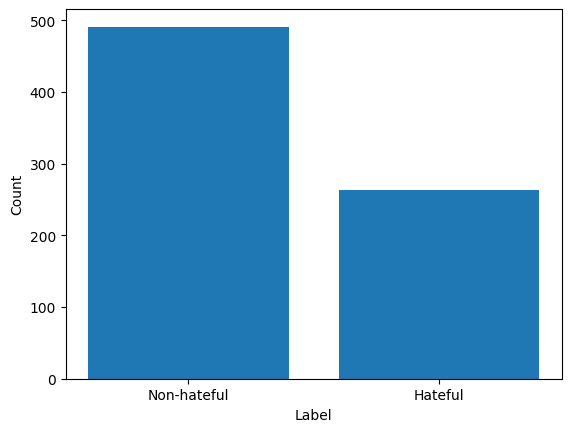

In [57]:
label_counts = Counter(x for x in data['label'])
labels = list(label_counts.keys())
freq = list(label_counts.values())

plt.bar(labels, freq)
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0,1], ['Non-hateful', 'Hateful'])
plt.show()

In [59]:
label_counts

Counter({0.0: 491, 1.0: 263})

In [60]:
data.to_csv("dataset.csv", index=False)

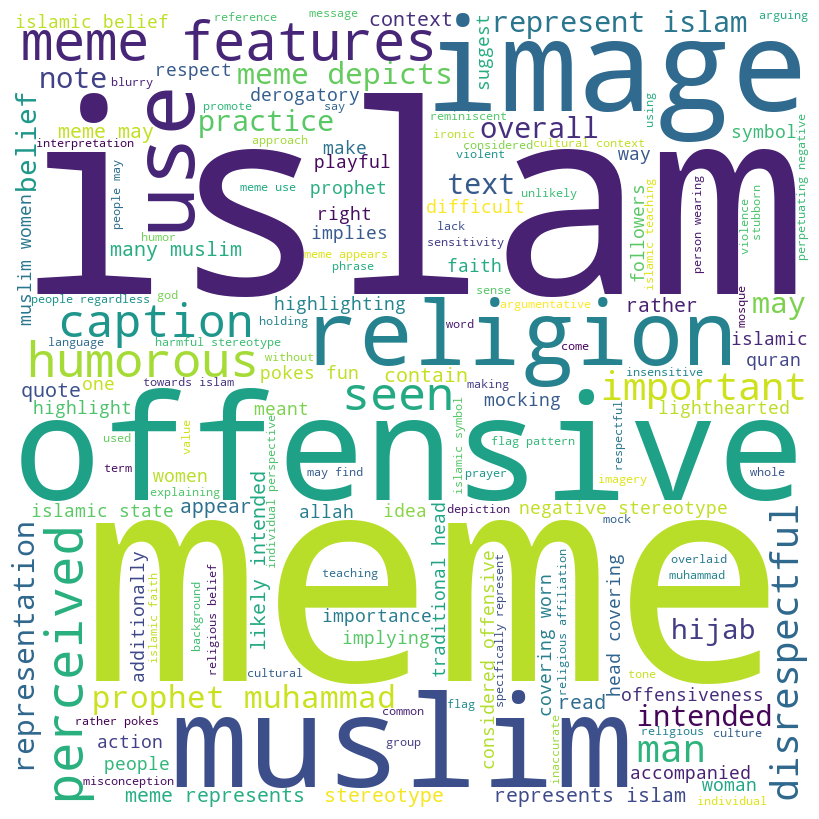

In [61]:
from wordcloud import WordCloud, STOPWORDS

content_words = ''
stopwords = set(STOPWORDS)

for val in data["content"]:
    val = str(val)
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    content_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(content_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()